Import dữ liệu

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Đọc dataset

In [6]:
from azureml.core import Workspace, Dataset

subscription_id = 'f0d11c61-044d-4f39-972d-1b731d4872f2'
resource_group = 'TenPM_Project'
workspace_name = 'tenpm-ML-workspace'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='Student_Dropout_Data')
data = dataset.to_pandas_dataframe()

{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe'}
{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe', 'activityApp': 'TabularDataset'}


In [7]:
data = data.iloc[:-14]
data

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,...,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,FIRST_TERM_Hr,SECOND_TERM_Hr
0,7808615.0,18.0,F,BGD 1,Y,N,Undeclared,1150.0,200708,ANTH,...,No Information,No Information,B,Bachelors,0.0,0.0,0.0,0.0,1.000000,1.000000
1,7830063.0,19.0,F,BGD 1,N,N,Undeclared,1190.0,200808,ANTH,...,College/Beyond,College/Beyond,B,Bachelors,570000.0,1355760.0,785760.0,459300.0,1.000000,1.000000
2,7847538.0,18.0,M,BGD 1,Y,N,Mathematics,1030.0,201008,ANTH,...,High School,Other/Unknown,B,Bachelors,0.0,0.0,0.0,0.0,1.000000,1.000000
3,8006429.0,18.0,M,BGD 1,Y,N,Undeclared,1220.0,200708,ANTH,...,College/Beyond,College/Beyond,B,Bachelors,0.0,0.0,0.0,0.0,1.000000,1.000000
4,7962680.0,18.0,F,BGD 1,Y,N,Art,1190.0,200808,ANTH,...,College/Beyond,High School,B,Bachelors,835920.0,1355760.0,519840.0,278340.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,7948112.0,18.0,F,BGD 4,N,N,Music Performance,790.0,200808,COMM,...,No Information,No Information,B,Bachelors,0.0,0.0,0.0,0.0,1.000000,0.812500
3396,8023055.0,18.0,F,BGD 1,Y,N,Biology,950.0,200708,POLS,...,No Information,No Information,B,Bachelors,0.0,0.0,0.0,0.0,0.692308,0.000000
3397,7926915.0,18.0,F,BGD 4,Y,N,Biology,1030.0,200808,ENGL,...,Other/Unknown,High School,B,Bachelors,0.0,945840.0,1288980.0,0.0,0.428571,0.000000
3398,7877332.0,18.0,F,BGD 3,Y,N,Joint Enrollment - Accel,990.0,201008,PSYC,...,High School,College/Beyond,B,Bachelors,0.0,269100.0,0.0,-231720.0,0.750000,0.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   float64
 1   STDNT_AGE                 3400 non-null   float64
 2   STDNT_GENDER              3400 non-null   object 
 3   STDNT_BACKGROUND          3400 non-null   object 
 4   IN_STATE_FLAG             3400 non-null   object 
 5   INTERNATIONAL_STS         3400 non-null   object 
 6   STDNT_MAJOR               3400 non-null   object 
 7   STDNT_TEST_ENTRANCE_COMB  3400 non-null   float64
 8   FIRST_TERM                3400 non-null   object 
 9   CORE_COURSE_NAME_1_F      3400 non-null   object 
 10  CORE_COURSE_GRADE_1_F     3400 non-null   object 
 11  CORE_COURSE_NAME_2_F      3400 non-null   object 
 12  CORE_COURSE_GRADE_2_F     3400 non-null   object 
 13  SECOND_TERM               3400 non-null   object 
 14  CORE_COU

Tách đặc trưng và nhãn

In [14]:
X=data.drop('RETURNED_2ND_YR',axis=1)
y=data['RETURNED_2ND_YR']

Chọn feature

In [15]:
selected_features = [
    "STDNT_TEST_ENTRANCE_COMB", 
    "UNMET_NEED",
    "HIGH_SCHL_GPA", 
    "FIRST_TERM_Hr", 
    "SECOND_TERM_Hr",
    "COST_OF_ATTEND", 
    'DISTANCE_FROM_HOME',
    "EST_FAM_CONTRIBUTION", 
    "GROSS_FIN_NEED",
]
X = data[selected_features]
X

,STDNT_TEST_ENTRANCE_COMB,UNMET_NEED,HIGH_SCHL_GPA,FIRST_TERM_Hr,SECOND_TERM_Hr,COST_OF_ATTEND,DISTANCE_FROM_HOME,EST_FAM_CONTRIBUTION,GROSS_FIN_NEED
0,1150.0,0.0,4.00,1.000000,1.000000,0.0,150.0,0.0,0.0
1,1190.0,459300.0,2.89,1.000000,1.000000,1355760.0,69.0,785760.0,570000.0
2,1030.0,0.0,3.39,1.000000,1.000000,0.0,150.0,0.0,0.0
3,1220.0,0.0,2.93,1.000000,1.000000,0.0,150.0,0.0,0.0
4,1190.0,278340.0,3.86,1.000000,1.000000,1355760.0,69.0,519840.0,835920.0
...,...,...,...,...,...,...,...,...,...
3395,790.0,0.0,3.93,1.000000,0.812500,0.0,871.0,0.0,0.0
3396,950.0,0.0,2.69,0.692308,0.000000,0.0,69.0,0.0,0.0
3397,1030.0,0.0,2.76,0.428571,0.000000,945840.0,90.0,1288980.0,0.0
3398,990.0,-231720.0,3.56,0.750000,0.000000,269100.0,0.0,0.0,0.0


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
final_df=scaler.fit_transform(X)

Encode dữ liệu

In [12]:
label_encoders = {}
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [23]:
X.columns

Index(['STDNT_TEST_ENTRANCE_COMB', 'UNMET_NEED', 'HIGH_SCHL_GPA',
       'FIRST_TERM_Hr', 'SECOND_TERM_Hr', 'COST_OF_ATTEND',
       'DISTANCE_FROM_HOME', 'EST_FAM_CONTRIBUTION', 'GROSS_FIN_NEED'],
      dtype='object')

Chia train/test và train model

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = {
        "model": model,
        "accuracy": acc,
        "y_pred": preds
    }

# In ra kết quả
for name in results:
    print(f"{name}: Accuracy = {results[name]['accuracy']:.4f}")

Random Forest: Accuracy = 0.8074
Logistic Regression: Accuracy = 0.8265
KNN: Accuracy = 0.7662


So sánh độ chính xác giữa các model

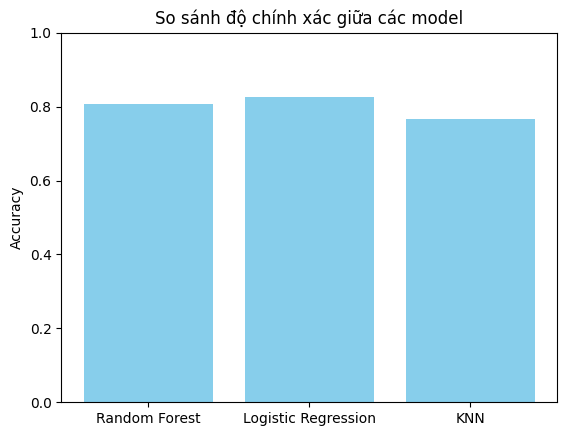

In [17]:
names = list(results.keys())
accuracies = [results[name]["accuracy"] for name in names]

plt.bar(names, accuracies, color='skyblue')
plt.ylabel("Accuracy")
plt.title("So sánh độ chính xác giữa các model")
plt.ylim(0, 1)
plt.show()

Ma trận nhầm lẫn cho model tốt nhất

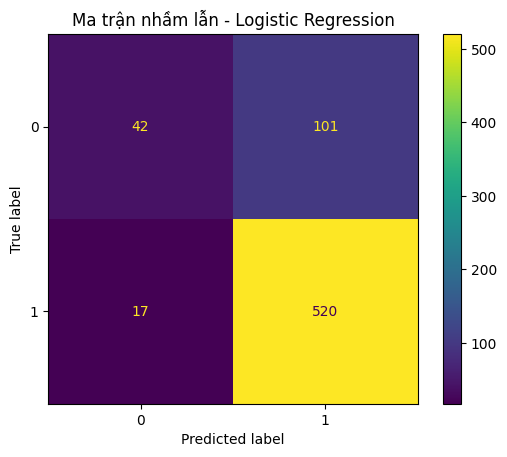

In [18]:
# Lấy model có accuracy cao nhất
best_model_name = max(results, key=lambda k: results[k]["accuracy"])
best_preds = results[best_model_name]["y_pred"]

cm = confusion_matrix(y_test, best_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f"Ma trận nhầm lẫn - {best_model_name}")
plt.show()

Lưu model tốt nhất

In [21]:
import joblib
joblib.dump(results[best_model_name]["model"], "model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")

['label_encoders.pkl']